In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
#load the data set
df=pd.read_csv('E:/Startups.csv')

In [25]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [26]:
#fix missing values
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [27]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [28]:
#convert categorical into numerical value
#df['State']=df['State'].map({'New York':0,'California':1,'Florida':2})
# also we can use #df1=pd.get_dummies(df['State'],drop_first=True)

In [31]:
#one more method to list all the states with certain values
df1=pd.get_dummies(df['State'])

In [32]:
df1

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


In [33]:
df=pd.concat([df1,df],axis=1)

In [34]:
df.head()

,California,Florida,New York,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,0,1,165349.20,136897.80,471784.10,New York,192261.83
1,1,0,0,162597.70,151377.59,443898.53,California,191792.06
2,0,1,0,153441.51,101145.55,407934.54,Florida,191050.39
3,0,0,1,144372.41,118671.85,383199.62,New York,182901.99
4,0,1,0,142107.34,91391.77,366168.42,Florida,166187.94


In [35]:
# we will drop state column since we got separate columns for states
df.drop('State',axis=1,inplace=True)

In [36]:
df.head()

,California,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,0,1,165349.20,136897.80,471784.10,192261.83
1,1,0,0,162597.70,151377.59,443898.53,191792.06
2,0,1,0,153441.51,101145.55,407934.54,191050.39
3,0,0,1,144372.41,118671.85,383199.62,182901.99
4,0,1,0,142107.34,91391.77,366168.42,166187.94


# Simple linear model using marketting spped and profit

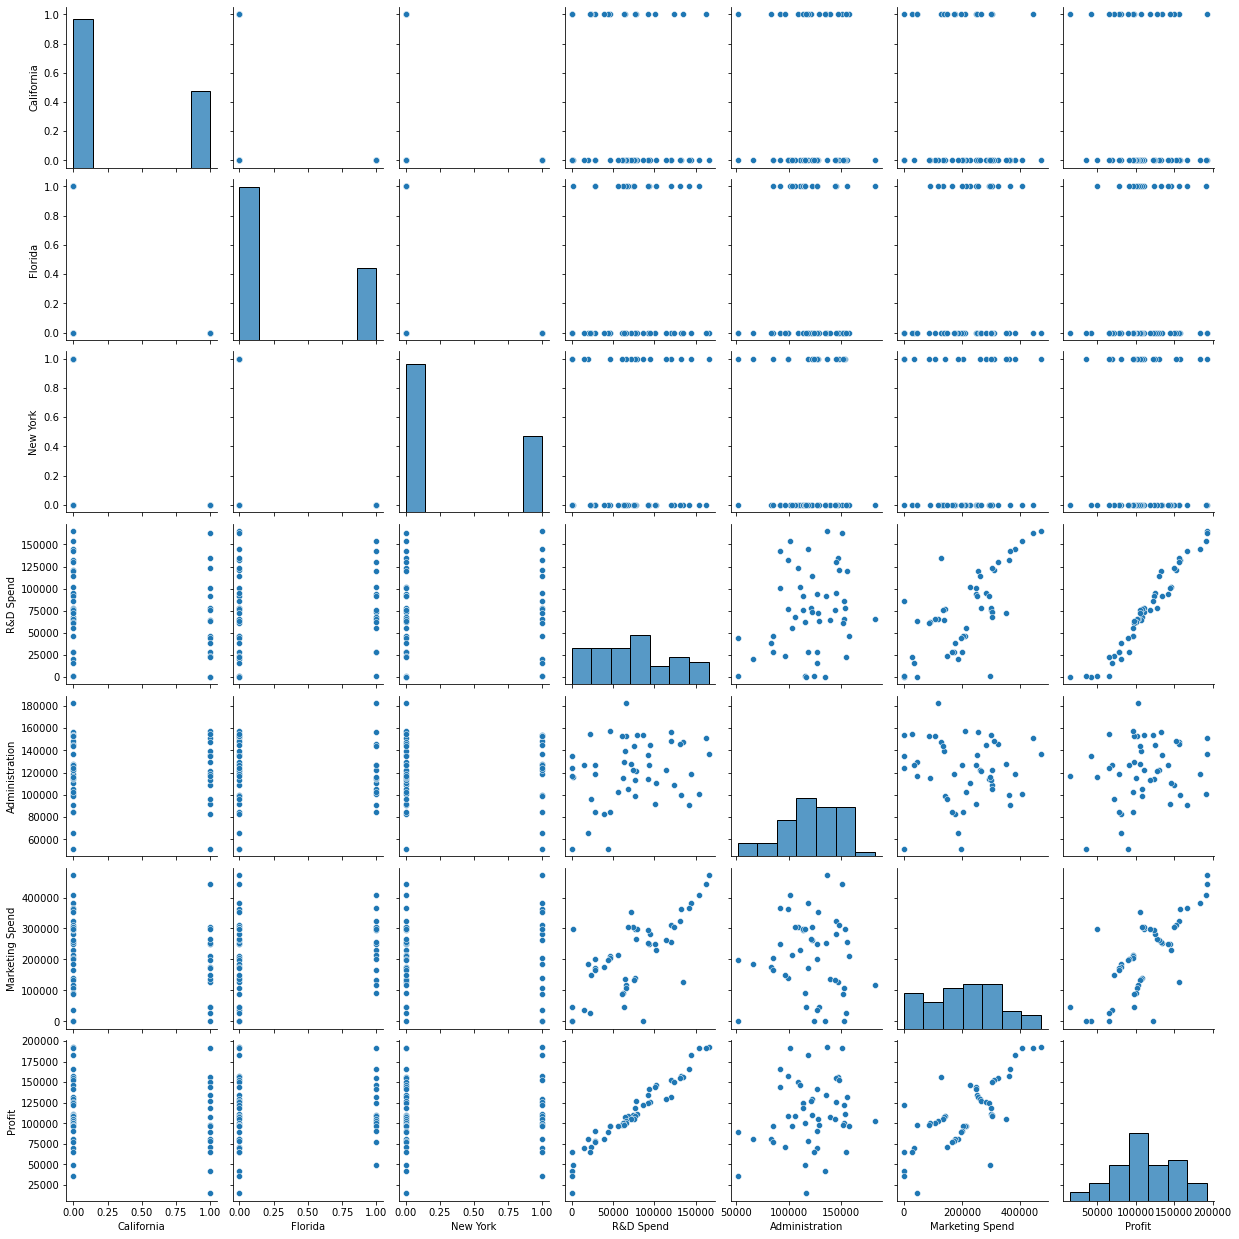

In [37]:
sns.pairplot(data=df)

from above pairplot we can see R&D spend is linearity to profit so we create a simple linear model with respect to both the datas

In [74]:
#assign x and y values

In [75]:
X=df.iloc[:,[3]]

In [76]:
X

,R&D Spend
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34
5,131876.90
6,134615.46
7,130298.13
8,120542.52
9,123334.88


In [77]:
Y=df.iloc[:,[-1]]

In [78]:
Y

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


In [79]:
# now we create simple linear model for x and y
#before that we split the data into test and train

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)

In [97]:
#libaruies for linear
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,Y_train)

LinearRegression()

In [55]:
df.head()

,California,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,0,1,165349.20,136897.80,471784.10,192261.83
1,1,0,0,162597.70,151377.59,443898.53,191792.06
2,0,1,0,153441.51,101145.55,407934.54,191050.39
3,0,0,1,144372.41,118671.85,383199.62,182901.99
4,0,1,0,142107.34,91391.77,366168.42,166187.94


In [58]:
#predicted output define
y_pred=regression.predict([[162597.70]])

In [59]:
y_pred

array([[188928.95567318]])

above we can see predicted is less that the actual output , so we conclude model is working fine with accuaracy and all 

In [98]:
#will try to find the rscore or accuaracy score for the model
from sklearn.metrics import r2_score
score=r2_score(Y_test, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [13, 1]

In [62]:
#above error we getting since we not made or make x data into correct shape

In [99]:
from sklearn.metrics import r2_score
score=r2_score(Y_test, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [13, 1]

#ou are running into that error because your X and Y don't have the same length (which is what train_test_split requires), i.e., X.shape[0] != Y.shape[0]. Given your current code:

In [81]:
#so we do feature scaling for the data we can go up and perform

In [90]:
# Feature Scaling ( actually its required for large data it seems we don't need here)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_Y = StandardScaler()
Y_train = sc_Y.fit_transform(Y_train)

In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)

In [92]:
#libaruies for linear
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,Y_train)

LinearRegression()

In [95]:
#predicted output define
y_pred=regression.predict([[162597.70]])

In [96]:
y_pred

array([[190430.73223225]])

aboe results seems working fine

In [100]:
#will try to find the rscore or accuaracy score for the model
from sklearn.metrics import r2_score
score=r2_score(Y_test, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [13, 1]